- T2-1.        
학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)          
            
(가) 제공 데이터 목록            
y_train: 생존여부(학습용)
X_trian, X_test : 승객 정보 (학습용 및 평가용)
                
(나) 데이터 형식 및 내용
y_trian (712명 데이터)

유의사항             
성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.               
수험번호.csv파일이 만들어지도록 코드를 제출한다.              
제출한 모델의 성능은 accuracy로 평가함       

##### 출력 형태

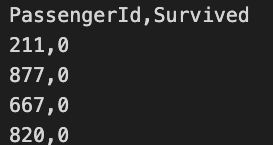

In [8]:
# import sklearn
# # dir(sklearn)
# dir(sklearn.metrics)

In [60]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

titanic_train = pd.read_csv('../data/titanic/train.csv', index_col = 'PassengerId')
titanic_test = pd.read_csv('../data/titanic/test.csv')
titanic_train.info() # 891

# titanic_test.info() # survived가 빠짐

# pclass = ticket class 1= 1st, 2= 2nd 3= 3rd
# sibsp = 함께 탑승한 형제 또는 배우자 수 
# parch = 함께 탑승한 부모 또는 자녀 수 
# ticket = ticket num
# fare = Passenger fare
# Cabin = 선실 번호
# embarked = 탑승 장소 > C = Cherbourg, Q = Queenstown, S = Southampton

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [61]:
# 지도 학습 - 분류 > 랜덤포레스트, 앙상블 XGBoost
# 분석용 df
titanic_da = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
titanic_target = titanic_train['Survived']

In [54]:
# help(pd.DataFrame.dropna)

In [62]:
titanic_da.isnull().sum()
titanic_da.drop('Cabin', axis= 1, inplace= True)
titanic_da.isnull().sum()

titanic_da.head()
titanic_da.isnull().sum()

titanic_da.dropna(how= 'any', inplace= True)
titanic_da.info() # 891 > 712


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_28780\485546918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_da.drop('Cabin', axis= 1, inplace= True)
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_28780\485546918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_da.dropna(how= 'any', inplace= True)


In [ ]:
# 1. 범주형 :  Pclass, Sex, Embarked


['KNNImputer',
 'MissingIndicator',
 'SimpleImputer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_knn',
 'typing']